<a href="https://colab.research.google.com/github/krucx/ML_from_scratch/blob/main/NueralNetworkFromScratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [201]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
import matplotlib.pyplot as plt
from sklearn.utils import shuffle

In [191]:
def initialise_weights(nueron_layers):
  weight_list = []
  biases = []
  for i in range(len(nueron_layers)-1):
    weight_list.append(np.random.randn(nueron_layers[i],nueron_layers[i+1]))
    biases.append(np.random.randn(1,nueron_layers[i+1]))
  
  return weight_list,biases

def sigmoid(z):
  return 1/(1+np.exp(-z))

def det_sigmoid(z):
  return (np.exp(-z)/(1+np.exp(-z))**2)

def forward_propogation(input,weight_list,biases):
  x = np.reshape(np.array(input),(1,len(input)))
  a = [x]
  z = [1]
  for i,weight in enumerate(weight_list):
    x = np.matmul(x,weight) + biases[i]
    z.append(x)
    x = sigmoid(x)
    a.append(x)
  return z,a

def loss_function(predicted,expected):
  return -1*np.sum(np.multiply(expected,np.log(predicted))+np.multiply(1-expected,np.log(1-predicted)))/3

def backpropogation(weight_list,biases,z,a,expected,lr):

  dz = a[-1] - expected

  for i in range(2,len(a)+1):
    dw = np.matmul(a[-i].T,dz)
    weight_list[1-i] = weight_list[1-i] - lr*dw
    biases[1-i] = biases[1-i] - lr*dz
    #print(weight_list[1-i].shape)
    dz = np.matmul(dz,weight_list[1-i].T)*det_sigmoid(z[-i])

def training(weight_list,biases,input,expected,lr):
  l = len(expected)
  expected = np.reshape(expected,(1,l))
  z,a = forward_propogation(input,weight_list,biases)
  print(a[-1],expected,loss_function(a[-1],expected))
  backpropogation(weight_list,biases,z,a,expected,lr)

#bce = tf.keras.losses.BinaryCrossentropy(from_logits=False)
#print(bce([[1.0,0.0,1.0]],predicted))

In [129]:
nueron_layers = [3,4,2,5,3] #list(map(int,input('Enter layer-wise nuerons').strip().split()))
weight_list,biases = initialise_weights(nueron_layers)
input = [2,3,4] #list(map(int,input('Enter input features').strip().split()))
expected = [1,0,1]

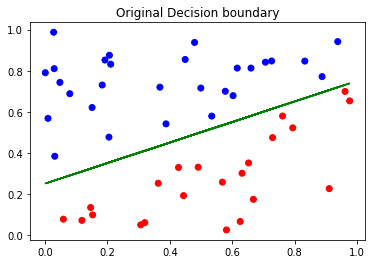

In [163]:
boundary = [0.5,-1,0.25]

def createDataset(theta=[0.5,-1,0.25],n=100):
  X=[]
  Y=[]
  for i in range(n):
    X.append([np.random.rand(), np.random.rand()])
    if X[-1][0]*theta[0] + X[-1][1]*theta[1] + theta[2]>=0:
      Y.append([1])
    else:
      Y.append([0])
  return X,Y

def visualize_dataset_with_basis(X,Y,theta,line_color='g'):
  color = ['r' if i[0]==1 else 'b' for i in Y]
  xs=[]
  ys=[]
  for i,j in X:
    xs.append(i)
    ys.append(j)
  plt.scatter(x=xs,y=ys,c=color)
  plt.plot(xs,(-theta[0]*np.array(xs)-theta[2])/theta[1],c=line_color)

X_t,Y_t = createDataset(boundary,50)
plt.title('Original Decision boundary')
visualize_dataset_with_basis(X_t,Y_t,boundary)

def accuracy(X_t,Y_t,weight_list,biases):
  correct = 0
  for i in range(len(X_t)):
    input = X_t[i]
    z,a = forward_propogation(input,weight_list,biases)
    if (a[-1][0]>=0.5)==Y_t[i][0]:
      correct+=1
  return correct/len(X_t)

In [164]:
print(X_t[:5])
print(Y_t[:5])

[[0.3875758095164674, 0.5409020481212425], [0.9764236770669492, 0.6528287564362061], [0.6678562927242208, 0.17329658002673287], [0.4907965252976102, 0.32982749205441686], [0.0006785714699096834, 0.7899198786251482]]
[[0], [1], [1], [1], [0]]


In [195]:
nueron_layers = [2,4,1] #list(map(int,input('Enter layer-wise nuerons').strip().split()))

def complete_training(nueron_layers,X_t,Y_t,epochs=20,lr=0.1):
  weight_list,biases = initialise_weights(nueron_layers)
  for i in range(epochs):
    for i in range(len(X_t)):
      input = X_t[i]
      expected = Y_t[i]
      training(weight_list,biases,input,expected,lr)
  acc = accuracy(X_t,Y_t,weight_list,biases)
  return '\n\nAccuracy : '+str(acc)

In [197]:
print(complete_training(nueron_layers,X_t,Y_t,epochs=20,lr=0.1))

[[0.55532738]] [[0]] 0.27013898715389406
[[0.49525489]] [[1]] 0.23422757009573889
[[0.55422415]] [[1]] 0.19672869261144332
[[0.57662098]] [[1]] 0.1835233684573502
[[0.60054804]] [[0]] 0.3058872602221606
[[0.5264889]] [[0]] 0.2491933046285366
[[0.51355018]] [[0]] 0.2402071789507982
[[0.51842131]] [[0]] 0.24356187819229047
[[0.46001343]] [[1]] 0.258833198358798
[[0.52358239]] [[0]] 0.2471534925028143
[[0.53152429]] [[1]] 0.21066879246275919
[[0.49655127]] [[0]] 0.22875779848274103
[[0.47550975]] [[0]] 0.21510948322429166
[[0.48222775]] [[0]] 0.21940660489640318
[[0.46174089]] [[1]] 0.25758379479710275
[[0.45555857]] [[1]] 0.262076992216366
[[0.47765893]] [[1]] 0.24628610909917945
[[0.55611131]] [[1]] 0.1955956041399368
[[0.55396425]] [[1]] 0.1968850419149011
[[0.55710516]] [[0]] 0.27147430323617733
[[0.51196432]] [[0]] 0.23912225387851752
[[0.4964761]] [[0]] 0.22870803540054854
[[0.48351209]] [[0]] 0.22023446408531913
[[0.46072659]] [[0]] 0.20584419279989893
[[0.42719506]] [[0]] 0.185736

In [141]:
training(weight_list,biases,input,expected)

[[0.63585442 0.10438119 0.75406395]] [[1 0 1]] 0.28176804298428


In [202]:
df = pd.read_csv('/content/Iris.csv')
df = df.drop(columns=['Id'])
df = shuffle(df)
df.sample(5)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
50,7.0,3.2,4.7,1.4,Iris-versicolor
1,4.9,3.0,1.4,0.2,Iris-setosa
44,5.1,3.8,1.9,0.4,Iris-setosa
74,6.4,2.9,4.3,1.3,Iris-versicolor
0,5.1,3.5,1.4,0.2,Iris-setosa


In [203]:
df1 = pd.get_dummies(df['Species'])
df = df.drop(columns=['Species'])
x = df.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df = pd.DataFrame(x_scaled)
df.head()

,0,1,2,3
0,0.222222,0.750000,0.152542,0.125000
1,0.027778,0.375000,0.067797,0.041667
2,0.944444,0.250000,1.000000,0.916667
3,0.500000,0.375000,0.627119,0.541667
4,0.222222,0.208333,0.338983,0.416667


In [204]:
X = df.values.tolist()
print(X[:5])
Y = df1.values.tolist()
print(Y[:5])

[[0.2222222222222221, 0.7499999999999998, 0.15254237288135591, 0.125], [0.0277777777777779, 0.375, 0.06779661016949151, 0.04166666666666667], [0.9444444444444442, 0.25, 1.0, 0.9166666666666666], [0.4999999999999998, 0.375, 0.6271186440677966, 0.5416666666666667], [0.2222222222222221, 0.20833333333333326, 0.3389830508474576, 0.4166666666666667]]
[[1, 0, 0], [1, 0, 0], [0, 0, 1], [0, 1, 0], [0, 1, 0]]


In [205]:
def accuracy(X_t,Y_t,weight_list,biases):
  correct = 0
  for i in range(len(X_t)):
    input = X_t[i]
    z,a = forward_propogation(input,weight_list,biases)
    if np.argmax(a[-1])==np.argmax(Y_t[i]):
      correct+=1
  return correct/len(X_t)

In [206]:
nueron_layers = [4,16,8,3]
print(complete_training(nueron_layers,X,Y,epochs=20,lr=0.1))

[[0.29747498 0.5796268  0.05053768]] [[1 0 0]] 0.7102989964127869
[[0.41524066 0.47560379 0.05784234]] [[1 0 0]] 0.5279958097193952
[[0.4768715  0.47266114 0.05505559]] [[0 0 1]] 1.395750669482237
[[0.44047428 0.36937329 0.10004264]] [[0 1 0]] 0.5606737296321053
[[0.35538722 0.49263455 0.09501447]] [[0 1 0]] 0.4156431502305578
[[0.26669982 0.64311172 0.08016633]] [[0 0 1]] 1.2880614222302447
[[0.27194969 0.50996732 0.1514847 ]] [[0 0 1]] 0.9726463203456897
[[0.28622743 0.32533573 0.23580362]] [[1 0 0]] 0.6378130463815963
[[0.33761163 0.41182932 0.23670105]] [[0 0 1]] 0.7945328856114942
[[0.38008184 0.20136664 0.31586609]] [[1 0 0]] 0.523941199326669
[[0.40319438 0.31695174 0.31434921]] [[0 0 1]] 0.684868123055662
[[0.43247298 0.15116639 0.38710566]] [[1 0 0]] 0.49723008119845796
[[0.52805667 0.13255323 0.31695382]] [[1 0 0]] 0.3873152077469085
[[0.53837401 0.20889936 0.3215952 ]] [[0 0 1]] 0.7139306743507176
[[0.53387526 0.10702036 0.36829172]] [[1 0 0]] 0.40003737776780723
[[0.5541200